I will look at the crime reports for drug related offenses and their spread across the state. While my data set does not have the specific drug related to each drug offense, these visuals will serve as a base for analysis that can be further explored through additional work.

### The Problem
The war on drugs has been a constant governmental issue since the 1970s. However, in the heart of Arizona, we can see that drug-related crimes have only been increasing year over year. In states that have legalized marijuana, violent crime has decreased not only in those states, but also in states that border the legalized state. With a vote coming up in November for the legalization of Marijuana, it would be a perfect time to run this test. Because I am interested in different affects that different drugs can have, this is an intruiging undertaking to see if a change in availability of certain low-risk drugs (like marijuana) can decrease drug crime overall.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches
from scipy import stats

In [2]:
crime_data = pd.read_csv("crime-datacrime-datacrimestat.csv")

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
crime_data.head()

,INC NUMBER,OCCURRED ON,OCCURRED TO,UCR CRIME CATEGORY,100 BLOCK ADDR,ZIP,PREMISE TYPE
0,201500002103724,11/01/2015 00:00,11/01/2015 15:21,DRUG OFFENSE,54XX W INDIAN SCHOOL RD,85031.0,APARTMENT
1,201600000594484,11/01/2015 00:00,NaN,RAPE,13XX E ALMERIA RD,85006.0,SINGLE FAMILY HOUSE
2,201500002102327,11/01/2015 00:00,11/01/2015 09:00,LARCENY-THEFT,51XX N 15TH ST,85014.0,APARTMENT
3,201600000527709,11/01/2015 00:00,03/22/2016 00:36,LARCENY-THEFT,33XX W CAMELBACK RD,85017.0,PARKING LOT
4,201500002101405,11/01/2015 00:00,11/01/2015 05:00,MOTOR VEHICLE THEFT,102XX W MEDLOCK AVE,85307.0,SINGLE FAMILY HOUSE


In [4]:
crime_data["UCR CRIME CATEGORY"].value_counts()

LARCENY-THEFT                            79777
BURGLARY                                 27735
MOTOR VEHICLE THEFT                      17102
DRUG OFFENSE                             11914
AGGRAVATED ASSAULT                       11495
ROBBERY                                   6786
RAPE                                      2226
ARSON                                      862
MURDER AND NON-NEGLIGENT MANSLAUGHTER      332
Name: UCR CRIME CATEGORY, dtype: int64

In [5]:
#Separating out the Drug Offense data
drug_offenses = crime_data.loc[(crime_data['UCR CRIME CATEGORY'] == 'DRUG OFFENSE') ,:]
drug_offenses.head()
drug_offenses.reset_index()
#Adding month, year, and date columns and looking how data is grouped
drug_offenses["year"] = drug_offenses['OCCURRED ON'].apply(lambda x: str(x)[6:10])
drug_offenses["month"] = drug_offenses['OCCURRED ON'].apply(lambda x: str(x)[0:2])
drug_offenses['date'] = drug_offenses['OCCURRED ON'].apply(lambda x: str(x)[0:10])

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] =

In [6]:
drug_offenses = drug_offenses.dropna(subset=['OCCURRED ON'])

In [7]:
drug_offenses_cleaned = drug_offenses[drug_offenses.month.apply(lambda x: str(x) != 'na')];
drug_offenses_cleaned.month.value_counts();
drug_offenses_cleaned.reset_index();

In [8]:
drug_offenses_cleaned['ZIP'] = drug_offenses_cleaned['ZIP'].astype(int)

In [9]:
#Drug data cannot be compared directly because not all days in the year are included
#Creating a reference table for how many days were included per year, 
#so we can compare crimes per day


days_included={}
days_included['2018']= drug_offenses_cleaned.loc[drug_offenses_cleaned['year'] == 
                                        '2018',:].date.nunique()
days_included['2017']= drug_offenses_cleaned.loc[drug_offenses_cleaned['year'] == 
                                        '2017',:].groupby('date').ngroups
days_included['2016']= drug_offenses_cleaned.loc[drug_offenses_cleaned['year'] == 
                                        '2016',:].groupby('date').ngroups
days_included['2015']= drug_offenses_cleaned.loc[drug_offenses_cleaned['year'] == 
                                        '2015',:].groupby('date').ngroups
print(days_included)

{'2018': 110, '2017': 365, '2016': 366, '2015': 61}


In [10]:
drug_yearly = drug_offenses_cleaned.year.value_counts().reset_index()
#Creating column for crimes per day for each year
drug_yearly['daily'] = drug_yearly['year'].astype(int)/drug_yearly['index'].apply(lambda x: days_included[str(x)])

In [11]:
drug_yearly = drug_yearly.sort_values('index').reset_index()

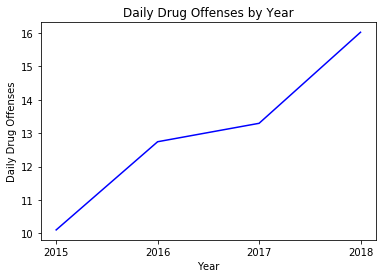

In [12]:
plt.plot(drug_yearly['index'], drug_yearly['daily'], color='b')
plt.xlabel("Year")
plt.ylabel("Daily Drug Offenses")
plt.title("Daily Drug Offenses by Year")
plt.show()

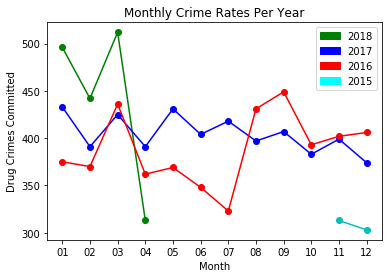

In [13]:
#Checking any monthly trends
#Creating function to split out monthly graph
def monthly_plot(year, color):
    drug_monthly = (drug_offenses_cleaned.loc[drug_offenses_cleaned.year == year, 
                                             :]['month'].value_counts().reset_index()
                                            .sort_values('index'))
    return plt.plot(drug_monthly['index'],drug_monthly['month'], color)

#Creating key for legend
r16 = mpatches.Patch(color='red', label='2016')
g18 = mpatches.Patch(color='green', label='2018')
b17 = mpatches.Patch(color='blue', label='2017')
c15 = mpatches.Patch(color='cyan', label='2015')

#Putting it all together
monthly_plot('2018', 'go-')
monthly_plot('2017', 'bo-')
monthly_plot('2016', 'ro-')
monthly_plot('2015', 'co-')
plt.xlabel('Month')
plt.ylabel('Drug Crimes Committed')
plt.legend(handles=[g18, b17, r16, c15])
plt.title('Monthly Crime Rates Per Year')
plt.show()

In [14]:
#np.random.seed(42)
#id_key = np.random.rand(43,1)
#id_bool = id_key > 0.5
#id_bool.astype(int)

In [15]:
#Looking at data by area
drug_zip = drug_offenses_cleaned[['INC NUMBER', 'ZIP']].groupby("ZIP").agg(len).reset_index()
drug_zip.sort_values('INC NUMBER', inplace=True, ascending=False)
drug_zip.reset_index(inplace=True, drop=True)
display(drug_zip)

,ZIP,INC NUMBER
0,85009,819
1,85017,759
2,85015,702
3,85008,617
4,85051,610
5,85021,564
6,85023,523
7,85029,419
8,85035,395
9,85040,370


In [16]:
#Too many zipcodes! Let's add in cities to narrow down groups
cities = pd.read_csv('Arizona_Zipcodes.csv')
cities = cities.loc[:,['zip', 'primary_city']]
cities.head()

,zip,primary_city
0,85001,Phoenix
1,85002,Phoenix
2,85003,Phoenix
3,85004,Phoenix
4,85005,Phoenix


In [17]:
drug_wzip = drug_offenses_cleaned.join(cities.set_index('zip'), on='ZIP');
drug_wzip.groupby('primary_city').count()

,INC NUMBER,OCCURRED ON,OCCURRED TO,UCR CRIME CATEGORY,100 BLOCK ADDR,ZIP,PREMISE TYPE,year,month,date
primary_city,,,,,,,,,,
Avondale,11,11,4,11,11,11,11,11,11,11
Buckeye,2,2,1,2,2,2,2,2,2,2
Cave Creek,9,9,6,9,9,9,9,9,9,9
Chandler,3,3,2,3,3,3,3,3,3,3
El Mirage,1,1,0,1,1,1,1,1,1,1
Gilbert,1,1,0,1,1,1,1,1,1,1
Glendale,158,158,64,158,158,158,158,158,158,158
Goodyear,1,1,0,1,1,1,1,1,1,1
Laveen,72,72,15,72,72,72,70,72,72,72


In [18]:
drug_offenses_cleaned.head()

,INC NUMBER,OCCURRED ON,OCCURRED TO,UCR CRIME CATEGORY,100 BLOCK ADDR,ZIP,PREMISE TYPE,year,month,date
0,201500002103724,11/01/2015 00:00,11/01/2015 15:21,DRUG OFFENSE,54XX W INDIAN SCHOOL RD,85031,APARTMENT,2015,11,11/01/2015
59,201500002101936,11/01/2015 09:43,NaN,DRUG OFFENSE,9XX S 17TH AVE,85007,APARTMENT,2015,11,11/01/2015
60,201500002101993,11/01/2015 09:52,11/01/2015 09:52,DRUG OFFENSE,42XX N 72ND LN,85033,STREET / ROADWAY / ALLEY / SIDEWALK,2015,11,11/01/2015
110,201500002104200,11/01/2015 15:48,NaN,DRUG OFFENSE,18XX W ADAMS ST,85007,VEHICLE,2015,11,11/01/2015
114,201500002104138,11/01/2015 16:10,11/01/2015 16:32,DRUG OFFENSE,3XX W BELL RD,85023,RETAIL BUSINESS,2015,11,11/01/2015


In [19]:
#renaming_dict = {'INC NUMBER':'Incident_ID', 'OCCURRED ON':'Occurance_Date', 'OCCURRED TO':'Crime_Solved', 'UCR CRIME CATEGORY':'Crime', '100 BLOCK ADDR':'Address', 'ZIP':'Zipcode', 'PREMISE TYPE':'Premise_Type'}
#crime_data_2018.rename(columns=renaming_dict, inplace=True)
#crime_data_drugs = crime_data_2018[crime_data_2018['Crime'] == 'DRUG OFFENSE']
#crime_data_drugs.head()

From the above visulizations, it is clear that crime in Arizona has been on the rise the past few years. I am attributing the dip in crimes per month in April to the fact that the data was incomplete for the month. This poses the question are the increasing regulations and active efforts to prevent drug use hurting or helping the issue of drug crime? From the data, it appears that current efforts are either ineffective or actually increasing drug crimes. This motivates the question I would like to ask with my experiment: Would decreased regulation, in this case the Legalization of Marijuana, decrease the amount of drug related crimes?

### Potential Solution
Proposed Hypothesis: The drug related crimes per day will decrease by 12.5%, or two crimes per day after the legalization of marijuana legislation is passed.

### Method of Testing
The two groups we will be comparing is the population of Phoenix metro area pre-legislation and post-legislation. Because we want to hollistically look at the affect on crime, we will not be sampling from our population. 

We will continue to monitor drug crimes for the four months leading up to the legislation change, July-October, and the 4 months following the legislation change, November-February. We are assuming that seasonality does not affect drug-related crimes specifically. While there is a chance that people are more likely to commit a drug-related crime during the summer when they are more likely to go on vacation and have more free time, we see no seasonality pattern in the line graph above so we will assume there is no contextual difference month-to-month.

We are assuming that the proposition in this upcoming vote is independent and entirely separate from other propositions posed and there are no other drug-related propositions that might have an effect on crimes per day.

Further, we assume that as a major metropolitan area, findings from this study can be applied to other large metropolitan areas such as New York City, Chicago, and Boston.

### Evaluation Plan
To evaluate success in this experiment, I will be looking at the change in crimes per day over the two four-month periods. I am looking to disprove my null hypothesis, that the Legalization of Marijuana has no significant affect on crimes per day.

My hypothesis is that the crimes per day will decrease by 2 crimes per day at the end of the 4 months. If crimes per day decreased, but not by 2 crimes per day, we will evaluate the data and continue tracking the crime data to see if time is also playing a factor in the results.

We are assuming that the knowledge of the Legalization of Marijuana will be widespread in a populous city such as Phoenix-metro. As such, we will conduct random surveys of registered voters, that we assume will be representative of the entire Phoenix-metro voter population, at the 30-day mark to see what percent of the population is aware that there: 
1. Was a vote for the proposition 
2. What the outcome of the proposition was 
3. Whether they agree with the outcome or not?

If less than 50% of our survey sample is not aware of the outcome of the proposition or that there was a vote, we will wait four months, survey a second sample, and move forward with data collection. There is a possibility that awareness has no affect on crimes per day, as the law-enforcement and courts will be aware of a change in legislation. However, if there is little affect to the crimes per day and awareness is still low, we will do further experimentation to see if increasing awareness of the proposition affects crimes per day.

Secondarily, we will want to look at all types of crime to see if there is any other crime categories that are affected by the change in legislation and how long it took to see a decrease in crimes per day. Further, I would be interested in running a survey to understand people's preception of marijuana post-legislation change - whether they see it as more medicinal, recreational, or neither to study if potential health benefits would be a driving factor in legalization. I would then target other metropolitan areas and see if promoting it largely as a beneficial wellness drug would impact a proposition vote.

## Appendix

In [21]:
#Toggling errors on and off from: Stack Overflow
from IPython.display import HTML
HTML('''<script>
code_show_err=false; 
function code_toggle_err() {
 if (code_show_err){
 $('div.output_stderr').hide();
 } else {
 $('div.output_stderr').show();
 }
 code_show_err = !code_show_err
} 
$( document ).ready(code_toggle_err);
</script>
To toggle on/off output_stderr, click <a href="javascript:code_toggle_err()">here</a>.''')

In [22]:
#Deciding appropriate sample size to run experiment with
#np.random.seed()
daily_drug = (drug_offenses_cleaned[drug_offenses_cleaned['year'] == '2018']
              .groupby('date').count())
daily_drug = daily_drug['INC NUMBER']
p_values = {}


for N in range(30,210,30):
    t_test=0
    for i in range(1000):
        control_group= np.random.choice(daily_drug, size=N)
        test_group = np.random.choice(np.maximum(daily_drug-2, 0), size=N)
    
        #do a ttest and store the p-value
        t_test += stats.ttest_ind(test_group,control_group)[1]
    p_values[N] = t_test/1000
    print('For a group size of {}, you will get a p-value of: {:3f}'.format(N,
                                                                        p_values[N]))
    print(control_group.std())
    print(control_group.mean())

For a group size of 30, you will get a p-value of: 0.228313
5.029800084385948
16.033333333333335
For a group size of 60, you will get a p-value of: 0.115190
4.520662439166288
15.616666666666667
For a group size of 90, you will get a p-value of: 0.054192
4.8241291672406765
16.166666666666668
For a group size of 120, you will get a p-value of: 0.030644
5.087505118752544
15.475
For a group size of 150, you will get a p-value of: 0.012886
5.087396190587087
15.72
For a group size of 180, you will get a p-value of: 0.006438
5.193452073952781
16.35


In [ ]:
group = np.random.choice(np.maximum(daily_drug-20, 0), size=30)
print(group)